In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Spam Email').getOrCreate()

from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
  
warnings.filterwarnings(action = 'ignore')
  
import gensim
from gensim.models import Word2Vec

df = pd.read_csv('spam_or_not_spam.csv')

/home/giotanna/.local/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df

,email,label
0,mike bostock said received from trackingNUMBE...,0
1,no i was just a little confused because i m r...,0
2,this is just an semi educated guess if i m wro...,0
3,jm URL justin mason writes except for NUMBER t...,0
4,i just picked up razor sdk NUMBER NUMBER and N...,0
...,...,...
1495,abc s good morning america ranks it the NUMBE...,1
1496,hyperlink hyperlink hyperlink let mortgage le...,1
1497,thank you for shopping with us gifts for all ...,1
1498,the famous ebay marketing e course learn to s...,1


In [3]:
df.isnull().sum()

email    1
label    0
dtype: int64

In [4]:
df = df.dropna(how='any',axis=0) 
#df.isnull().sum()

In [5]:
df.groupby('label').count()

,email
label,
0,1000
1,499


In [6]:
#df['email'].iloc[2]

In [7]:
#we use BagOfWord, Bi-gram,n-gram, TF-IDF & Word2Vec

#removing the URL
import re 
def clean_url(email_text):
    return re.sub(r'http\S+',' ', email_text)
df['CleanEmail'] = df['email'].apply(clean_url)

In [8]:
#df['CleanEmail'].iloc[2]

In [9]:
#removing numbers and punctuation
def clean_non_alphanumeric(email_text):
    return re.sub('[^a-zA-Z]',' ',email_text)
df['CleanEmail'] = df['CleanEmail'].apply(clean_non_alphanumeric)

In [10]:
#df['CleanEmail'].iloc[2]

In [11]:
#convert all characters into lowercase
def clean_lowercase(email_text):
    return str(email_text).lower()
df['CleanEmail'] = df['CleanEmail'].apply(clean_lowercase)

In [12]:
#df['CleanEmail'].iloc[2]

In [13]:
import nltk
from nltk.tokenize import word_tokenize

#Tokenization
def clean_tokenization(email_text):
    return word_tokenize(email_text)
df['CleanEmail'] = df['CleanEmail'].apply(clean_tokenization)

In [14]:
#df['CleanEmail'].iloc[2]

In [15]:
#df.head(5)

In [16]:
from nltk.corpus import stopwords
#removing stop words (is , a, ..)
stop_words = set(stopwords.words('english'))
def clean_stopwords(token):
    return [item for item in token if item not in stop_words]
df['CleanEmail'] = df['CleanEmail'].apply(clean_stopwords)

In [17]:
#df['CleanEmail'].head(5)

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/giotanna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from nltk.stem import WordNetLemmatizer

#Lemmatization (saw -> see)
lemma=WordNetLemmatizer()

def clean_lemmatization(token):
    return [lemma.lemmatize(word=w,pos='v') for w in token]
df['CleanEmail'] = df['CleanEmail'].apply(clean_lemmatization)

In [20]:
#df['CleanEmail'].head(5)

In [21]:
#removing the words having legth <= 2
def clean_length(token):
    return [i for i in token if len(i) > 2]
df['CleanEmail'] = df['CleanEmail'].apply(clean_length)

In [22]:
#df['CleanEmail'].head(5)

In [23]:
#coverting list to string
def convert_to_string(listReview):
    return ' '.join(listReview)
df['CleanEmail'] = df['CleanEmail'].apply(convert_to_string)

In [24]:
df['CleanEmail'].head(5)

0    mike bostock say receive trackingnumber url nu...
1    little confuse run procmail gateway sit extern...
2    semi educate guess wrong someone please correc...
3    url justin mason write except number thing def...
4    pick razor sdk number number number number age...
Name: CleanEmail, dtype: object

In [25]:
#split out dataset with respect to labels
SpamEmail = df[df.label == 1 ]['CleanEmail']
NotSpamEmail = df[df.label == 0 ]['CleanEmail']

In [26]:
SpamEmail
NotSpamEmail

0      mike bostock say receive trackingnumber url nu...
1      little confuse run procmail gateway sit extern...
2      semi educate guess wrong someone please correc...
3      url justin mason write except number thing def...
4      pick razor sdk number number number number age...
                             ...                        
995    man kill try surf tube train ananova wednesday...
996    gianni good resource url url walk guide umber ...
997    gianni ponzi write prob try install linux try ...
998    neale pickett neale woozle org write skip mont...
999    think need give little detail information wed ...
Name: CleanEmail, Length: 1000, dtype: object

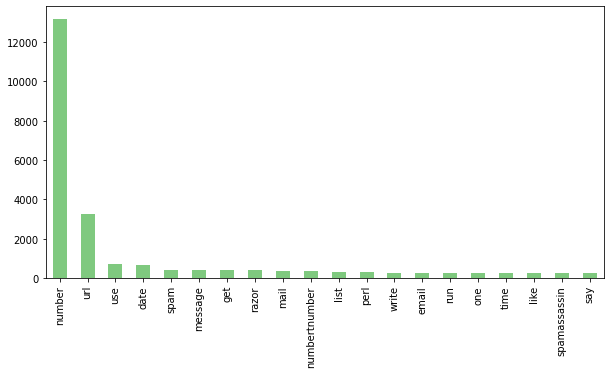

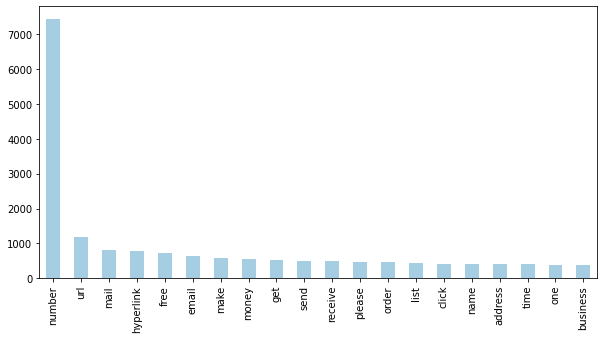

In [27]:
from matplotlib import pyplot as plt

#taking top 20 words and see their frequency
color = ['Accent', 'Paired']
splitedData = [NotSpamEmail,SpamEmail]

for item in range(2):
    plt.figure(figsize=(10,5))
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(20).plot(kind='bar',colormap=color[item])
    plt.show()

In [28]:
#removing the word ‘number’, which is common in all the labels and having highest frequency

def Number_Word_Remove(email_text):
    return ' '.join([i for i in email_text.split() if i != 'number'])
SpamEmail = SpamEmail.apply(Number_Word_Remove)
NotSpamEmail = NotSpamEmail.apply(Number_Word_Remove)
df['CleanEmail'] = df['CleanEmail'].apply(Number_Word_Remove)

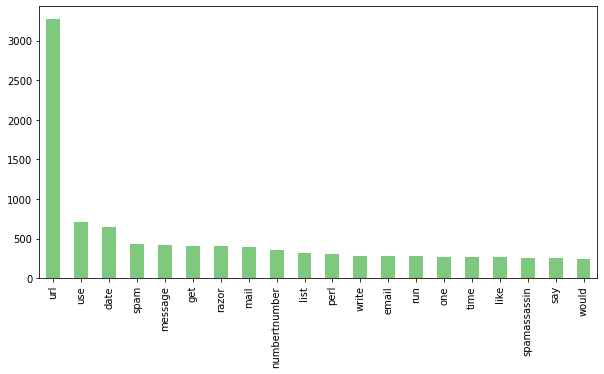

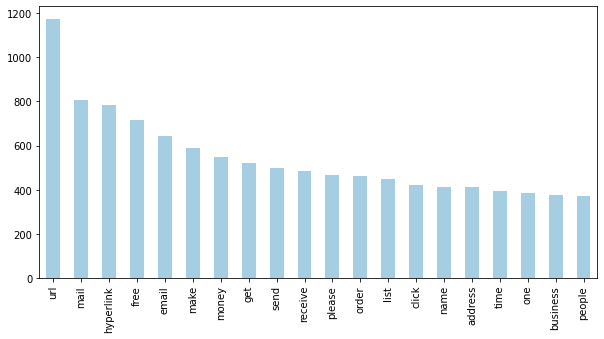

In [29]:
color = ['Accent', 'Paired']
splitedData = [NotSpamEmail,SpamEmail]

for item in range(2):
    plt.figure(figsize=(10,5))
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(20).plot(kind='bar',colormap=color[item])
    plt.show()

In [30]:
df

,email,label,CleanEmail
0,mike bostock said received from trackingNUMBE...,0,mike bostock say receive trackingnumber url ur...
1,no i was just a little confused because i m r...,0,little confuse run procmail gateway sit extern...
2,this is just an semi educated guess if i m wro...,0,semi educate guess wrong someone please correc...
3,jm URL justin mason writes except for NUMBER t...,0,url justin mason write except thing defang mim...
4,i just picked up razor sdk NUMBER NUMBER and N...,0,pick razor sdk agents razor site use suse inta...
...,...,...,...
1495,abc s good morning america ranks it the NUMBE...,1,abc good morning america rank christmas toy se...
1496,hyperlink hyperlink hyperlink let mortgage le...,1,hyperlink hyperlink hyperlink let mortgage len...
1497,thank you for shopping with us gifts for all ...,1,thank shop gift occasion free gift purchase li...
1498,the famous ebay marketing e course learn to s...,1,famous ebay market course learn sell complete ...


In [31]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#x = le.fit_transform(df.CleanEmail.values)

In [32]:
#vectorize CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(df.CleanEmail).toarray()

In [33]:
#split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df.label, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [34]:
x_train.shape


(955, 18269)

In [35]:
x_test.shape

(375, 18269)

In [36]:
y_train.shape

(955,)

In [37]:
y_test.shape

(375,)

In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

#BUILD THE MODEL 
model = Sequential()
model.add(Dense(200,input_shape=(18269,)))
model.add(Dropout(0.7))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #adam(good) sgd->too many repeats
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               3654000   
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 3,674,201
Trainable params: 3,674,201
Non-trainable params: 0
_________________________________________________________________


In [39]:
#history = model.fit(x_train,y_train,epochs=8,batch_size=100)

In [41]:
#Train the model 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit(x_train,y_train, epochs=128, validation_data=(x_val,y_val), batch_size = 100, callbacks=[es])
results = model.evaluate(x_test, y_test, batch_size=11)
print(results)

Epoch 1/128
10/10 [==============================] - 1s 72ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2286 - val_accuracy: 0.9763
Epoch 2/128
10/10 [==============================] - 1s 66ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2342 - val_accuracy: 0.9763
Epoch 3/128
10/10 [==============================] - 1s 72ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2397 - val_accuracy: 0.9763
Epoch 4/128
10/10 [==============================] - 1s 115ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2441 - val_accuracy: 0.9763
Epoch 5/128
10/10 [==============================] - 1s 97ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2484 - val_accuracy: 0.9763
Epoch 6/128
10/10 [==============================] - 1s 66ms/step - loss: 8.8580e-04 - accuracy: 1.0000 - val_loss: 0.2525 - val_accuracy: 0.9763
Epoch 7/128
10/10 [==============================] - 1s 66ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2563 - val_accuracy: 0.9763
E

In [42]:
import numpy as np
import sklearn.metrics as metrics
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       240
           1       0.94      1.00      0.97       135

    accuracy                           0.98       375
   macro avg       0.97      0.98      0.98       375
weighted avg       0.98      0.98      0.98       375



In [43]:
print (metrics.f1_score(y_test,y_pred,average='weighted',labels=np.unique(y_pred)))

0.9787928301426655
